***Simulation of Linear Time Series Models***


**(a) Simulate AR(1) model with parameter values +/- 0.9 and σw² = 1 and MA(1) model with parameter values +/- 0.5 and σw² = 1. Obtain ACF and PACF plots in all four cases.** <br>
**(b) Simulate an AR(2) process: Xt = 1.5X<sub>t-1</sub> 0.75X<sub>t-2</sub> + W<sub>t</sub>;  σw² = 1. Find roots of AR(2) polynomial and ACF and PACF plot.**<br>
**(c) Simulate ARMA(1,1) process Xt = 0.9X<sub>t-1</sub> 0.5W<sub>t-1</sub> + W<sub>t</sub>;  σw² = 1. Obtain ACF and PACF plots with all four cases.**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess

In [2]:
np.random.seed(1)
n = 1000 #samples

a

In [3]:
def simulate_and_plot(ar_params, ma_params, title):
    """
    Simulate AR/MA/ARMA process and plot:
    1. Time Series
    2. ACF
    3. PACF
    """
    ar = np.r_[1, -np.array(ar_params)]  
    ma = np.r_[1,  np.array(ma_params)]

    process = ArmaProcess(ar, ma)
    x = process.generate_sample(nsample=n, scale=1)

    plt.figure(figsize=(14, 10))

    plt.subplot(3, 1, 1)
    plt.plot(x)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Value")

    plt.subplot(3, 1, 2)
    plot_acf(x, lags=30, ax=plt.gca())
    plt.title("ACF")

    plt.subplot(3, 1, 3)
    plot_pacf(x, lags=30, ax=plt.gca(), method='ywm')
    plt.title("PACF")

    plt.tight_layout()
    plt.show()

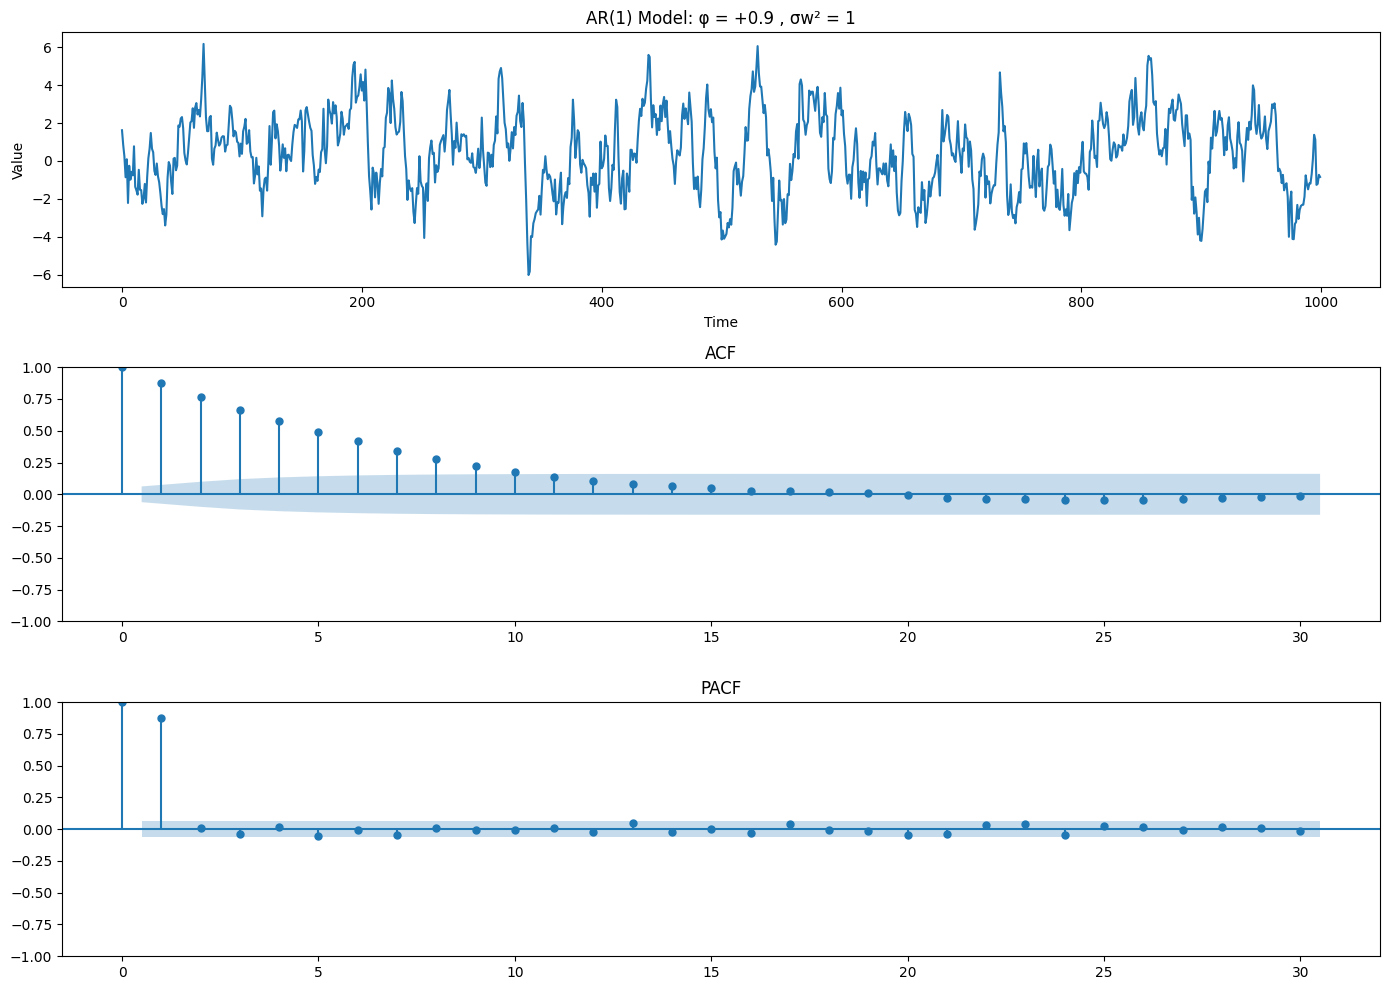

In [4]:
# AR(1) with +0.9
simulate_and_plot([0.9], [], "AR(1) Model: φ = +0.9 , σw² = 1")

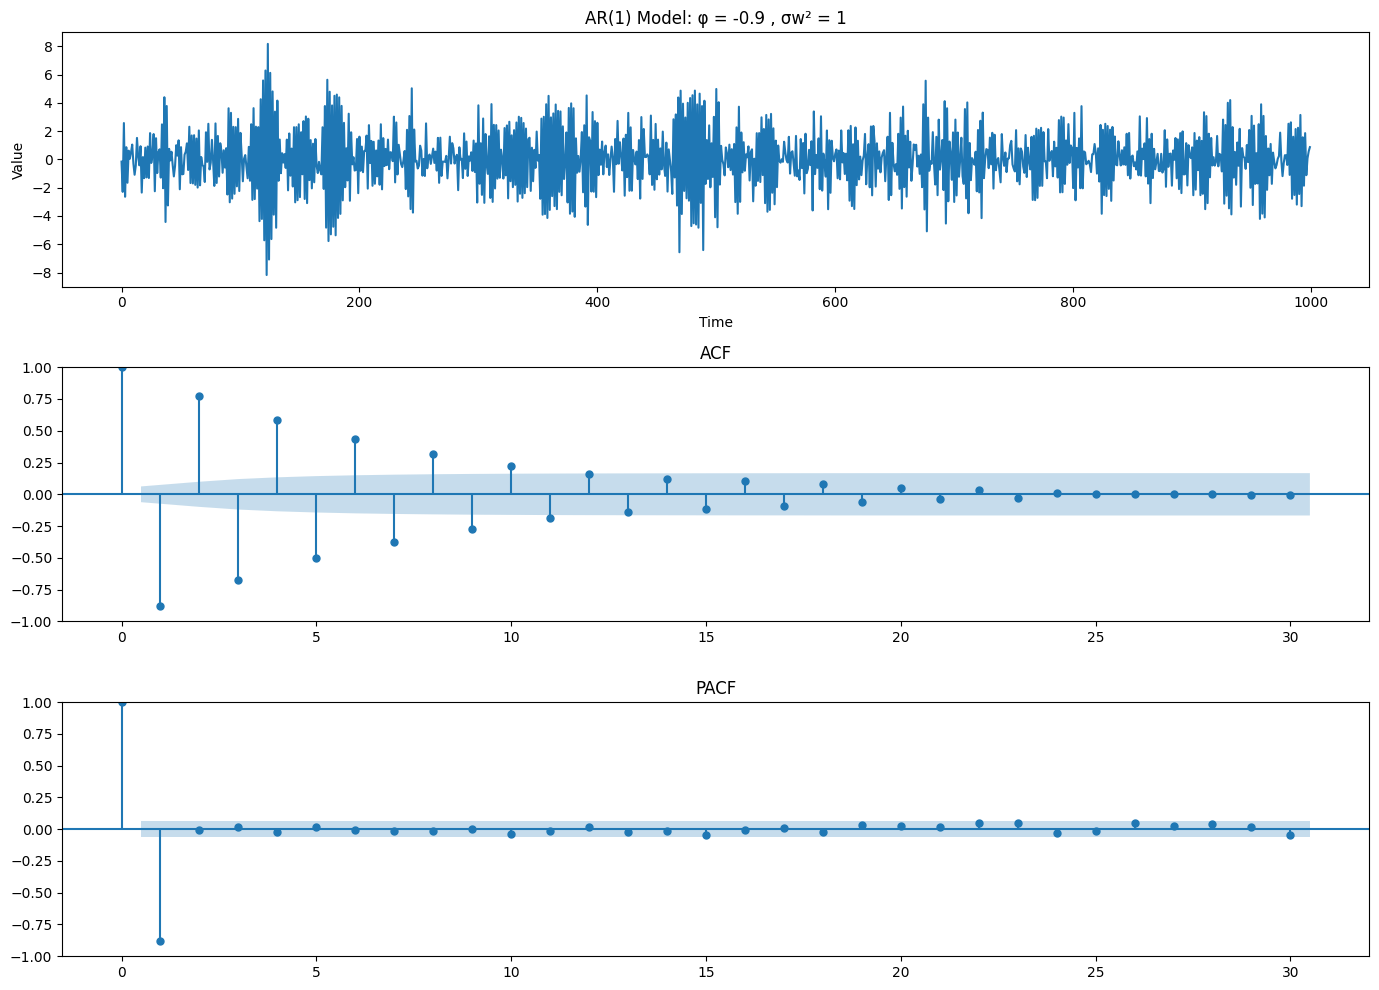

In [5]:
# AR(1) with -0.9
simulate_and_plot([-0.9], [], "AR(1) Model: φ = -0.9 , σw² = 1")

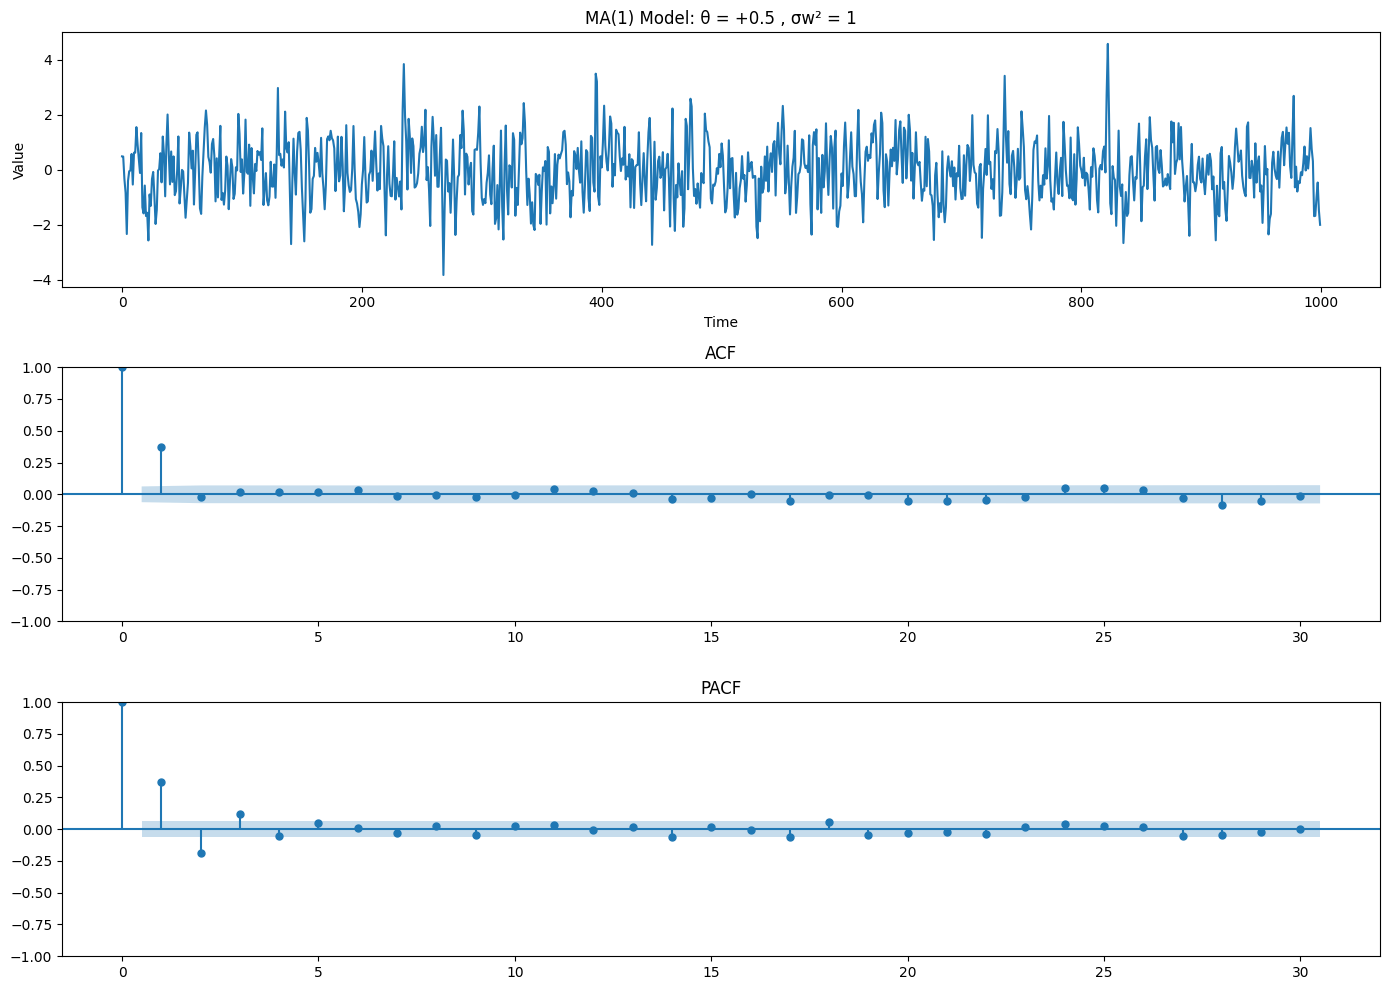

In [6]:
# MA(1) with +0.5
simulate_and_plot([], [0.5], "MA(1) Model: θ = +0.5 , σw² = 1") 

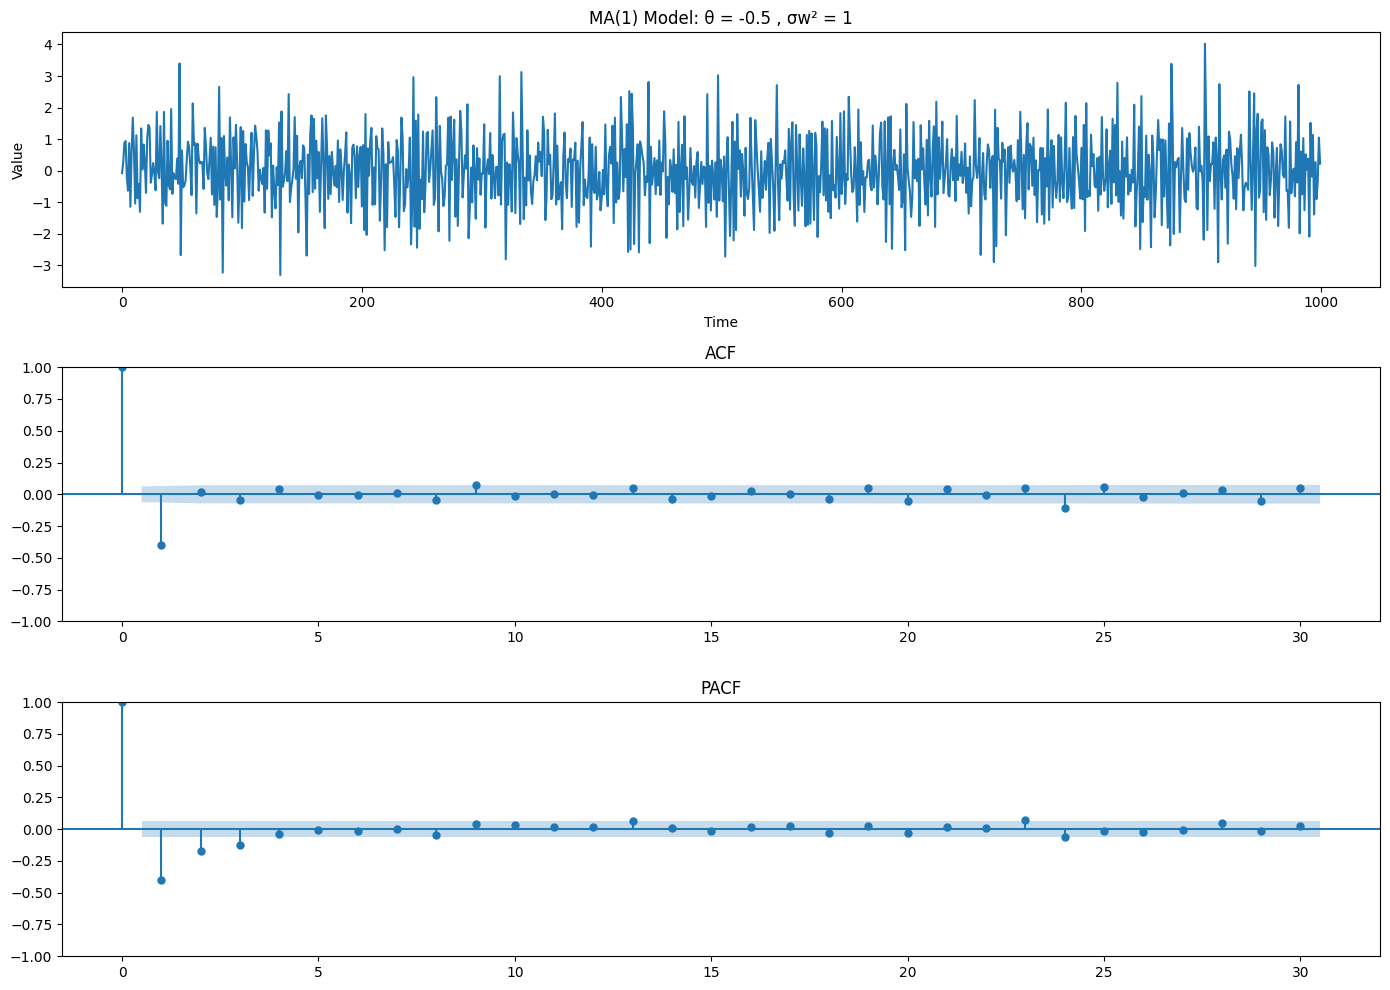

In [7]:
# MA(1) with -0.5
simulate_and_plot([], [-0.5], "MA(1) Model: θ = -0.5 , σw² = 1")

b

*X<sub>t</sub> = 1.5X<sub>t-1</sub> - 0.75X<sub>t-2</sub> + W<sub>t</sub>*

In [8]:
phi1 = 1.5
phi2 = -0.75

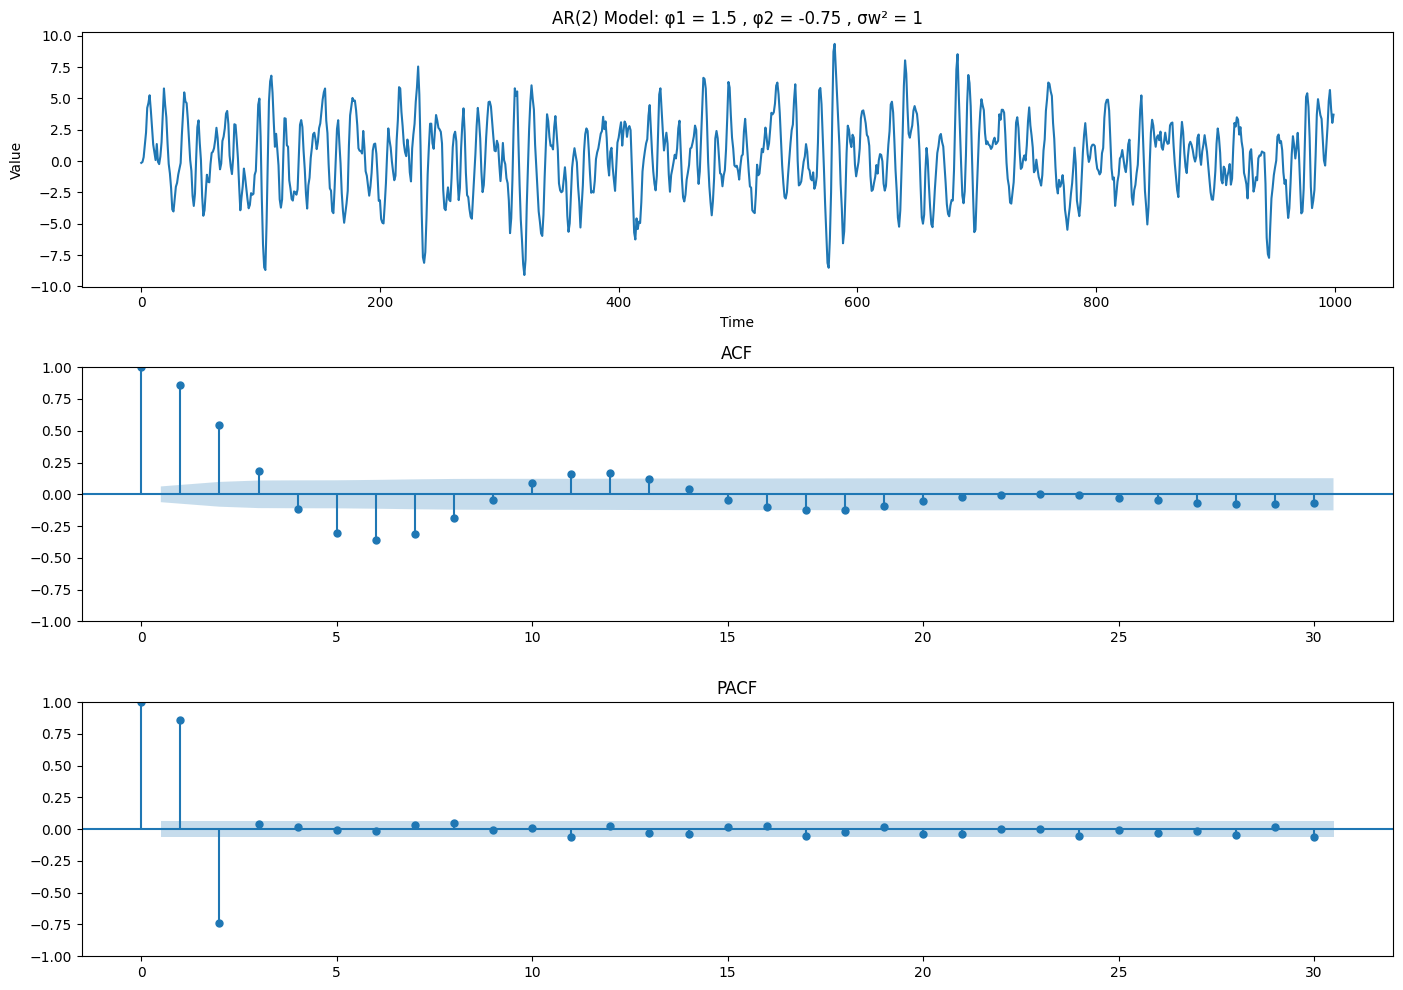

In [9]:
simulate_and_plot([phi1, phi2], [], "AR(2) Model: φ1 = 1.5 , φ2 = -0.75 , σw² = 1")

In [10]:

coefficients = [0.75, -1.5, 1]
roots = np.roots(coefficients)

print("AR(2) Polynomial: 1 - 1.5z + 0.75z^2 = 0")
print("Roots of AR(2) polynomial:", roots)
print("Magnitude of roots:", np.abs(roots))
print("Stationary if all |roots| > 1")

AR(2) Polynomial: 1 - 1.5z + 0.75z^2 = 0
Roots of AR(2) polynomial: [1.+0.57735027j 1.-0.57735027j]
Magnitude of roots: [1.15470054 1.15470054]
Stationary if all |roots| > 1


c

In [11]:
arma_cases = [
    ([0.9], [0.5], "ARMA(1,1): φ = +0.9 , θ = +0.5"),
    ([0.9], [-0.5], "ARMA(1,1): φ = +0.9 , θ = -0.5"),
    ([-0.9], [0.5], "ARMA(1,1): φ = -0.9 , θ = +0.5"),
    ([-0.9], [-0.5], "ARMA(1,1): φ = -0.9 , θ = -0.5"),
]

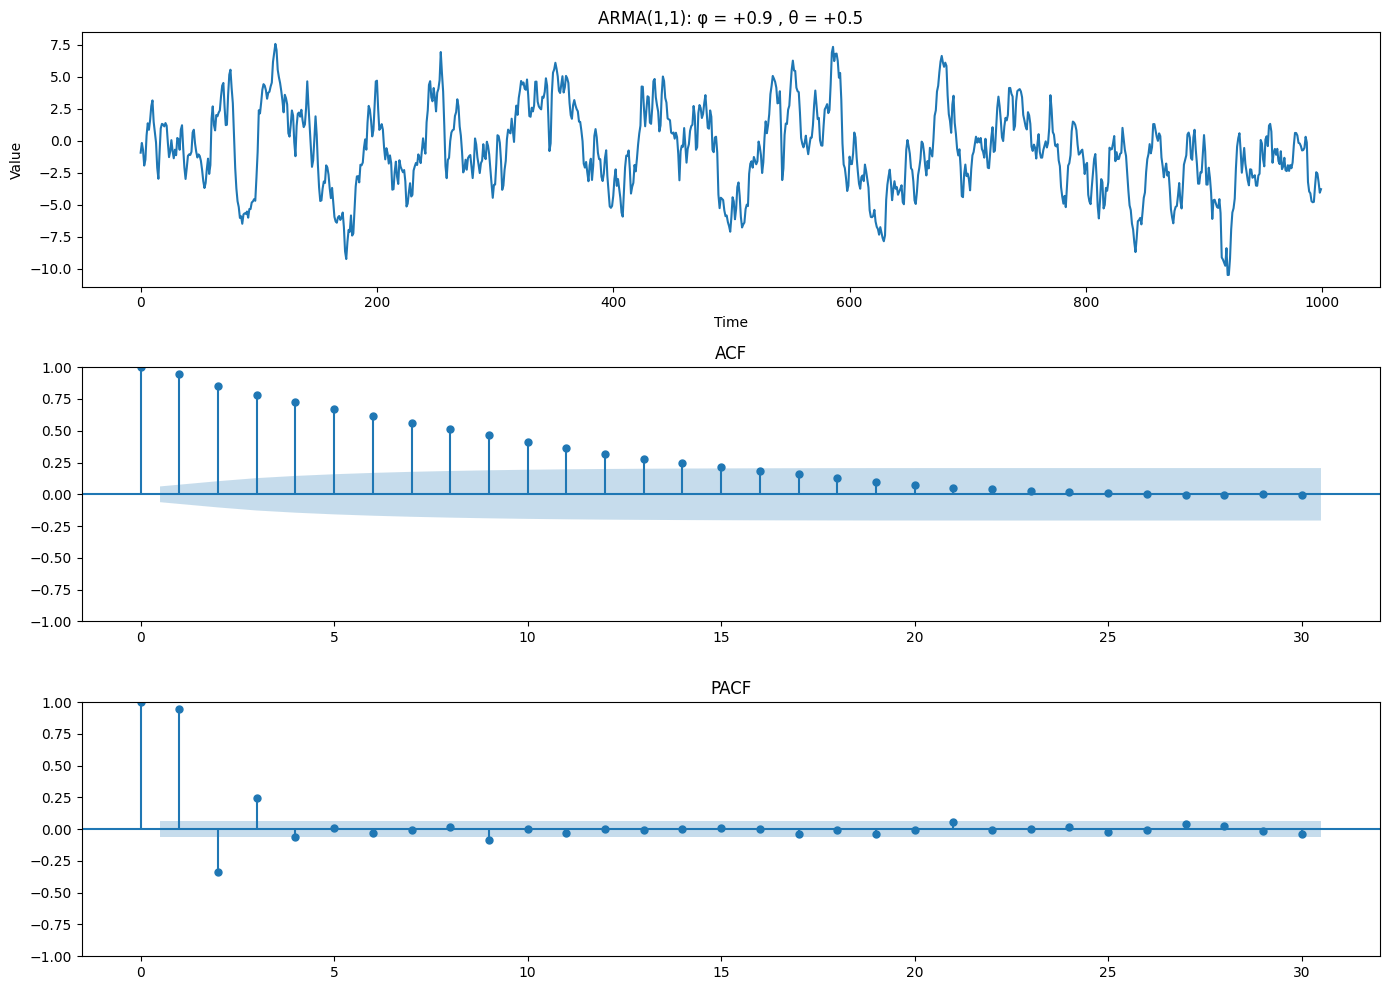

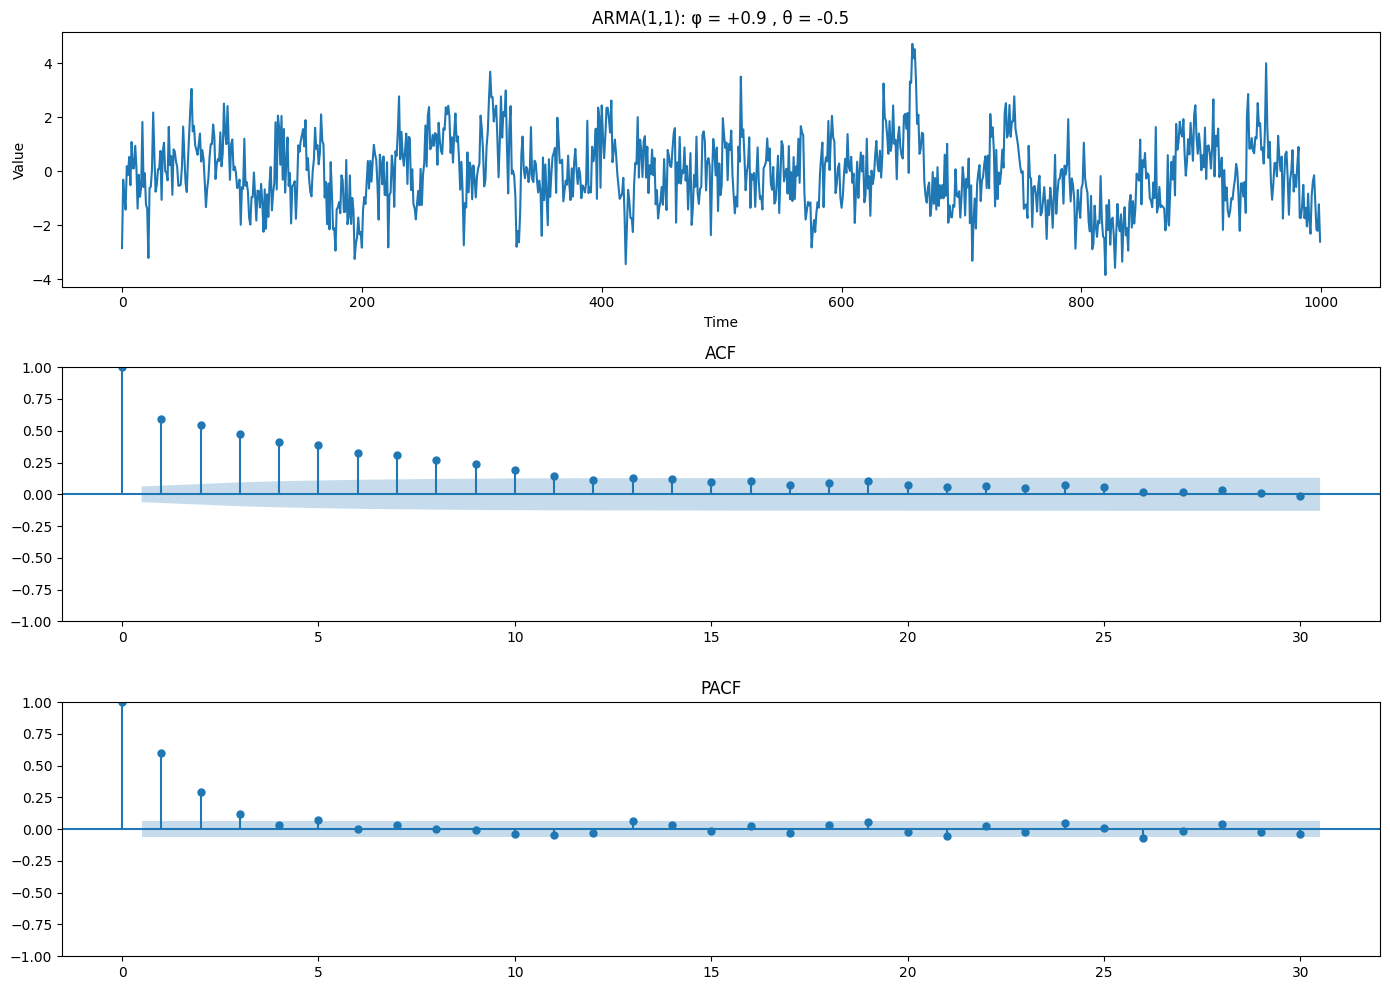

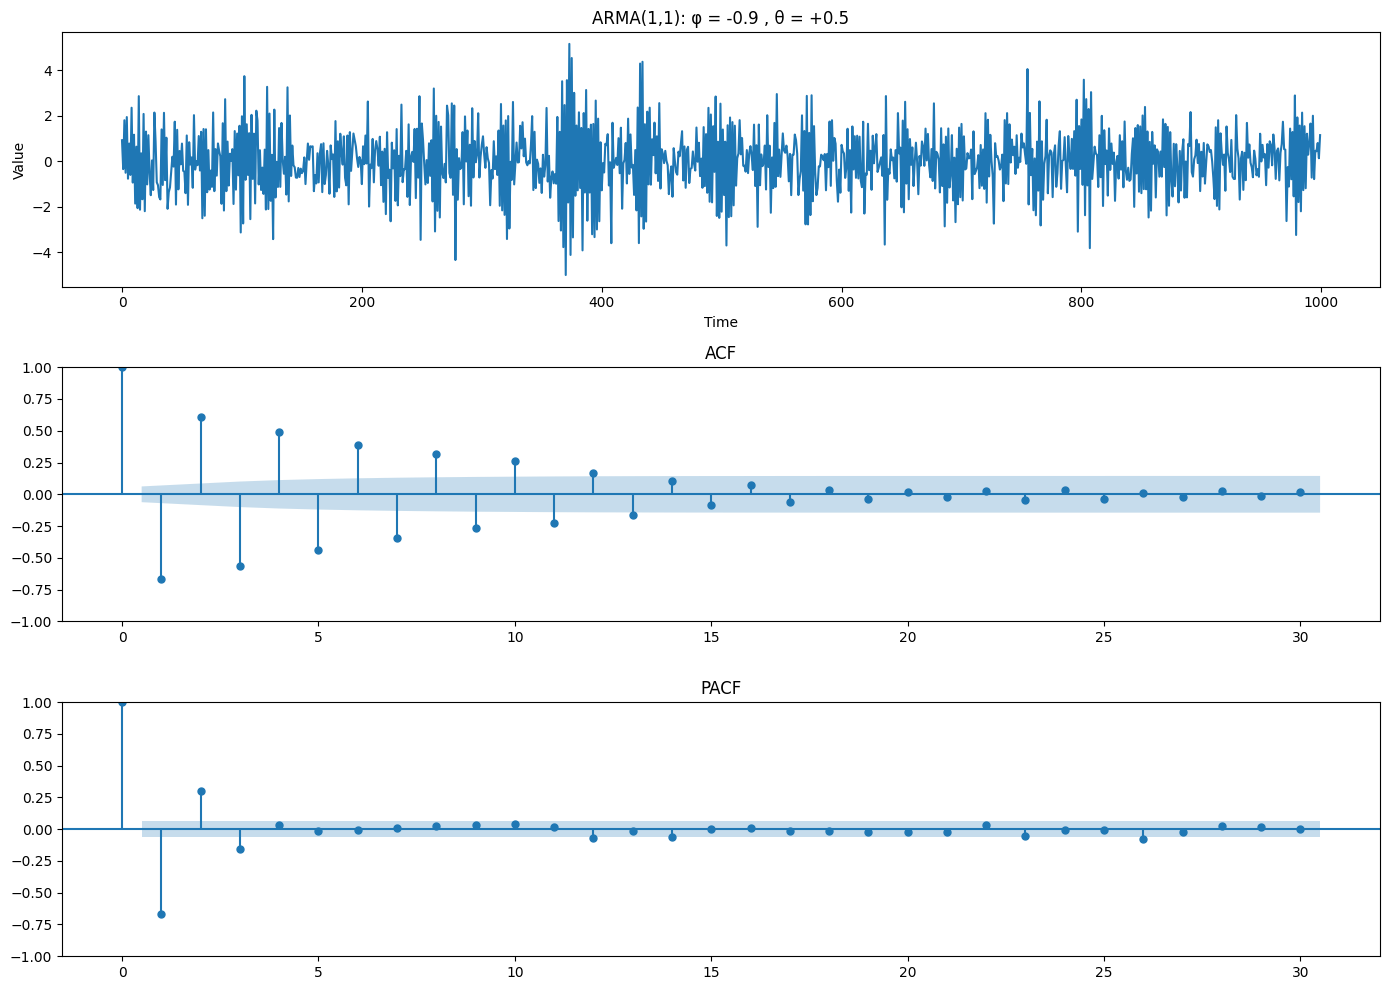

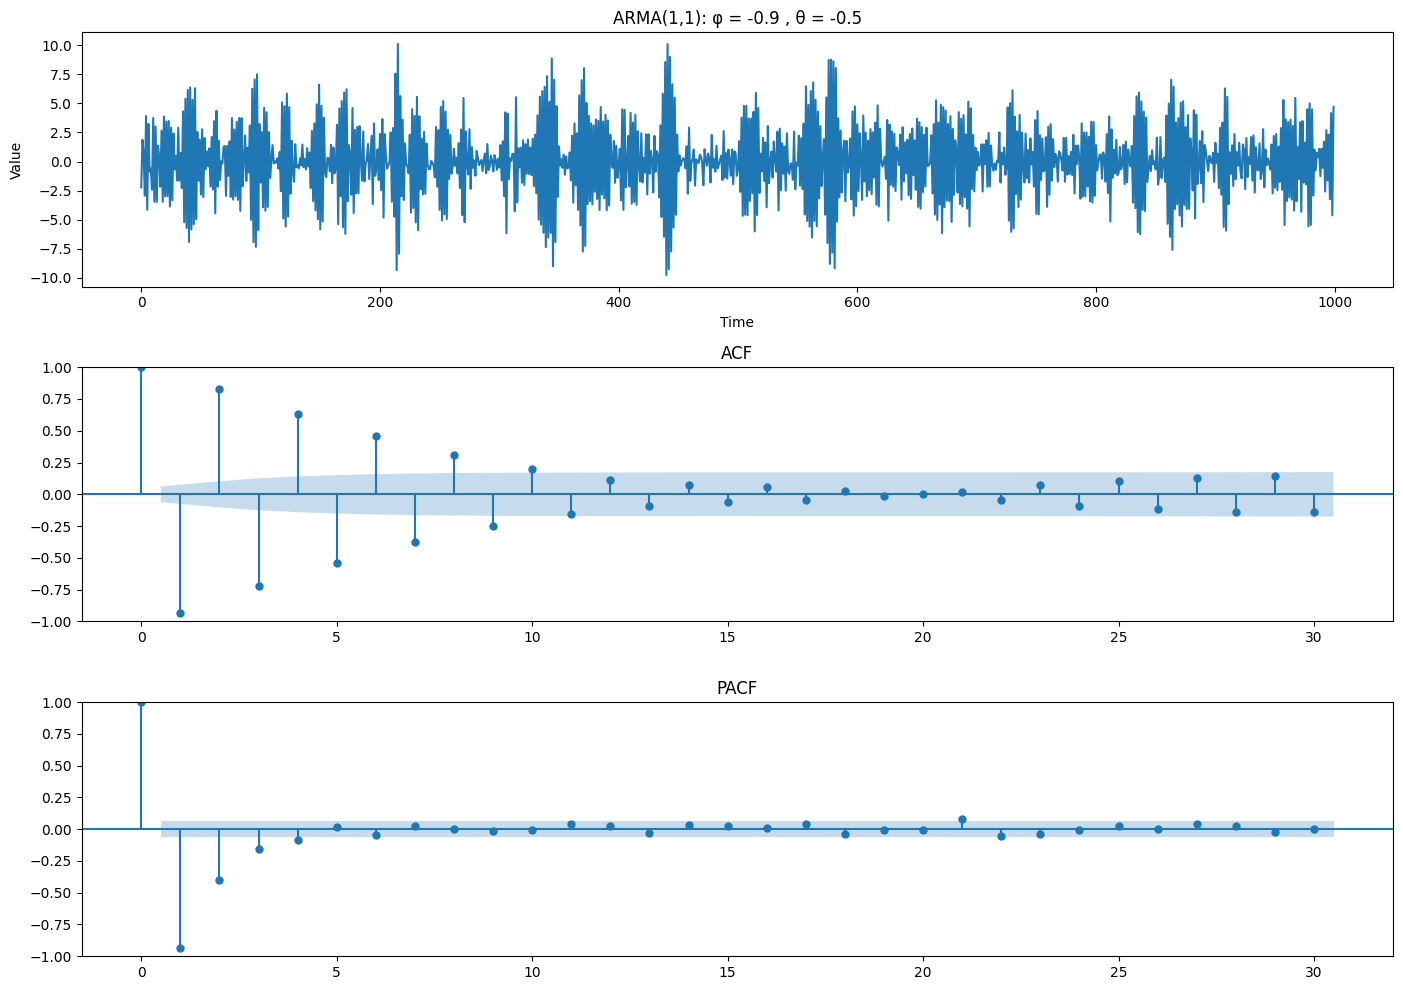

In [12]:

for ar_p, ma_p, title in arma_cases:
    simulate_and_plot(ar_p, ma_p, title)

ma process : acf cutoff <br>
ar process : pacf process<br>
arma process : no acf nor pcf cutoff 
